##Analyse Descriptive 2

####Bases de données: Zones argileuses dans le 31, 13 et 44 (Géorisques)

Nous étudions les bases de données qui vont nous permettre de mesurer le risque de sécheresse dans trois départements stratégiques : Haute-Garonne (31), Bouches-du-Rhone (13), Loire-Atlantique (44). 

Nous voulons mettre en avant les possibles disparités qu'il peut y avoir sur ces territoires afin de vérifier la pertinence de nos bases pour intégrer le risque de sécheresse à notre cartographie finale. 

####Importation des packages nécessaires 

In [ ]:
pip install geopandas

In [ ]:
pip install contextily

In [ ]:
!pip install --upgrade botocore==1.23.26  #Sur colab, sinon bug
!pip install --upgrade urllib3==1.22.0 #Sur colab, sinon bug
!pip install py7zr #Sur colab, sinon bug
!pip install s3fs #Sur colab, sinon bug
!git clone https://github.com/InseeFrLab/cartogether.git
%cd ./cartogether
!pip install -r requirements.txt
!pip install .


In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [4]:
import geopandas as gpd
import contextily as ctx

####Importation des données
####Départements étudiés : 31 Haute-Garonne / 13 Bouches-du-Rhone / 44 Loire-Atlantique 
                          

In [5]:
#DataFrame localisant les zones argileuses : 31_Haute-Garonne 
df_31=gpd.read_file("/content/AleaRG31_L93.shp")
df_31.to_csv("/content/argile_31.csv")
df_31.head()

,dpt,niveau,alea,geometry
0,31,3,Fort,"POLYGON ((495896.412 6186868.528, 495898.615 6..."
1,31,3,Fort,"POLYGON ((500436.973 6183638.292, 500432.951 6..."
2,31,3,Fort,"POLYGON ((498937.351 6196429.129, 498934.549 6..."
3,31,3,Fort,"POLYGON ((535746.374 6218809.177, 535741.153 6..."
4,31,3,Fort,"POLYGON ((571694.762 6284476.659, 571696.138 6..."


In [ ]:
df_31.columns

Index(['dpt', 'niveau', 'alea', 'geometry'], dtype='object')

In [6]:
#DataFrame localisant les zones argileuses : 13 Bouches-du-Rhone 
df_13=gpd.read_file("/content/ExpoArgile_13_L93.shp")
df_13.to_csv("/content/argile_13.csv")
df_13.head()

,DPT,NIVEAU,ALEA,geometry
0,13,2.0,Moyen,"POLYGON ((883232.000 6251520.000, 883276.696 6..."
1,13,2.0,Moyen,"POLYGON ((892798.812 6242908.812, 892809.000 6..."
2,13,3.0,Fort,"POLYGON ((892451.957 6290676.439, 892389.752 6..."
3,13,2.0,Moyen,"POLYGON ((891064.663 6246122.552, 890979.000 6..."
4,13,2.0,Moyen,"POLYGON ((866804.715 6249570.717, 866823.000 6..."


In [7]:
df_13.columns

Index(['DPT', 'NIVEAU', 'ALEA', 'geometry'], dtype='object')

In [8]:
#DataFrame localisant les zones argileuses : 44 Loire-Atlantique
df_44=gpd.read_file("/content/AleaRG44_L93.shp")
df_44.to_csv("/content/argile_44.csv")
df_44.head()

,dpt,niveau,alea,geometry
0,44,3,Fort,"POLYGON ((326769.434 6718612.987, 326738.365 6..."
1,44,1,Faible,"POLYGON ((338499.773 6674577.539, 338479.543 6..."
2,44,1,Faible,"POLYGON ((312810.394 6710621.279, 312803.348 6..."
3,44,1,Faible,"POLYGON ((301000.076 6713328.258, 301000.718 6..."
4,44,1,Faible,"POLYGON ((368573.659 6662715.839, 368570.851 6..."


####Analyse descriptive et visualisation des données

In [11]:
#Calcul du score moyen de "sécheresse" (i.e. niveau de gonflement/retrait d'argile, échelle de 1 à 3) pour les départements étudiés 
moy = pd.DataFrame(data={'DEP':[31,13,44], 'Niveau moyen':[np.mean(df_31["niveau"]),np.mean(df_13["NIVEAU"]),np.mean(df_44["niveau"])]})
moy

,DEP,Niveau moyen
0,31,2.104147
1,13,2.210018
2,44,1.550984


Le niveau de sécheresse évalué (sur une échelle de 1 à 3, du plus faible au plus fort) dans ces trois départements présente des disparités géographiques. 

En moyenne, il est de 2,1 sur le territoire de Haute-Garonne (31) et de 2,21 dans les Bouches-du-Rhone (13) alors que il n'est que de 1,55 en Loire-Atlantique (44). 

Si l'étude est ici menée sur trois départements stratégiques, il semble que certains départements sont davantage exposés au risque de sécheresse que d'autres. 

###Cartographie des zones de sécheresse préoccupantes dans les 3 départements 

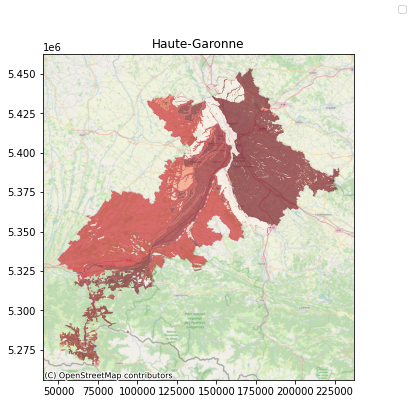

In [28]:
#Cartographie des zones de sécheresse dans les départements étudiés : 31
fig,axs = plt.subplots(figsize=(6,6)) 
df_31.to_crs(3857).plot(ax = axs, alpha = 0.6,zorder=2,cmap="Reds_r")
axs.set_title("Haute-Garonne")
fig.legend()
ctx.add_basemap(ax = axs,source=ctx.providers.OpenStreetMap.Mapnik)
plt.show()

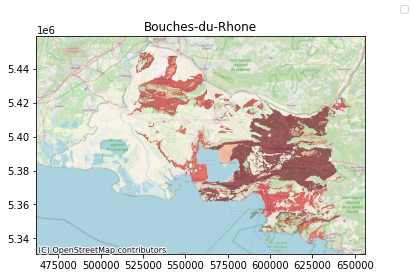

In [31]:
#Cartographie des zones de sécheresse dans les départements étudiés : 13
fig,axs = plt.subplots(figsize=(6,4)) 
df_13.to_crs(3857).plot(ax = axs, alpha = 0.6,zorder=2,cmap="Reds_r")
axs.set_title("Bouches-du-Rhone")
fig.legend()
ctx.add_basemap(ax = axs,source=ctx.providers.OpenStreetMap.Mapnik)
plt.show()

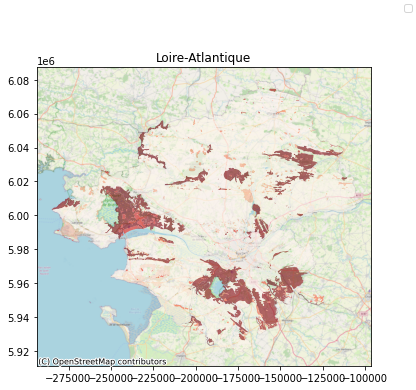

In [33]:
#Cartographie des zones de sécheresse dans les départements étudiés : 44
fig,axs = plt.subplots(figsize=(6,6)) 
df_44.to_crs(3857).plot(ax = axs, alpha = 0.6,zorder=2,cmap="Reds_r")
axs.set_title("Loire-Atlantique")
fig.legend()
ctx.add_basemap(ax = axs,source=ctx.providers.OpenStreetMap.Mapnik)
plt.show()

####Représentation des différences d'intensité de gonflement/retrait des zones argileuses dans les différents départements 

alea
Faible     82
Fort      195
Moyen     808
Name: alea, dtype: int64


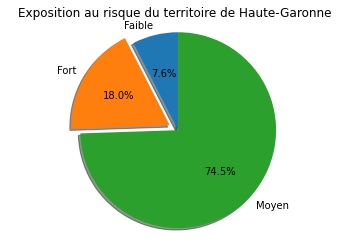

In [49]:
#Département 31
labels = 'Faible', 'Fort', 'Moyen'
sizes = df_31.groupby(["alea"])["alea"].count()
print(df_31.groupby(["alea"])["alea"].count())
explode = (0, 0.1, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
ax1.set_title("Exposition au risque du territoire de Haute-Garonne")
plt.show()

ALEA
Fort     239
Moyen    899
Name: ALEA, dtype: int64


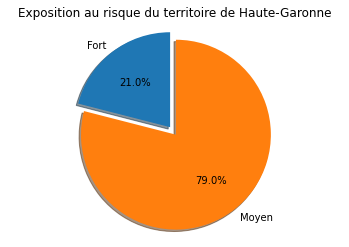

In [47]:
#Département 13
labels = 'Fort', 'Moyen'
sizes = df_13.groupby(["ALEA"])["ALEA"].count()
print(df_13.groupby(["ALEA"])["ALEA"].count())
explode = (0.1, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
ax1.set_title("Exposition au risque du territoire de Haute-Garonne")
plt.show()

alea
Faible    545
Fort       43
Moyen     530
Name: alea, dtype: int64


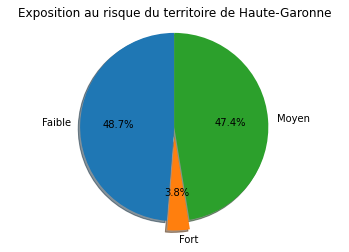

In [45]:
#Département 44
labels = 'Faible', 'Fort', 'Moyen'
sizes = df_44.groupby(["alea"])["alea"].count()
print(df_44.groupby(["alea"])["alea"].count())
explode = (0, 0.1, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
ax1.set_title("Exposition au risque du territoire de Haute-Garonne")
plt.show()

Seulement 3,8% du territoire de Loire-Atlantique est exposé à un fort risque contre 21% dans les Bouches-du-Rhone (et 18% en Haute-Garonne). 

